<a href="https://colab.research.google.com/github/mohammadreza-mohammadi94/Application_Deployed_Streamlit/blob/master/Clustering_Darsman/V68_Agglomerative.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libs

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

In [7]:
import warnings
warnings.filterwarnings("ignore")

# Creating Dataset

In [8]:
data , _ = make_blobs(n_samples = 6000,
                      n_features = 5,
                      centers = 4,
                      random_state=0)

data

array([[  5.30677672,   1.41512   ,   3.25990252,   8.5674855 ,
         -9.32074687],
       [  0.28897306,   5.01165949,   2.03335629,   0.3104451 ,
         -2.16975531],
       [  2.33664265,  -1.85791226,   8.6768608 ,  10.13072089,
         -1.51167074],
       ...,
       [ -9.42697728,  -8.14989621,   7.56106166,   6.08821316,
          8.52132939],
       [ -7.66098541, -10.16640927,   6.75664449,   5.3238966 ,
          7.0068191 ],
       [ -8.89462179,  -8.19820688,   7.02709459,   6.33123662,
          7.65967714]])

# Perform PCA

In [9]:
pca = PCA(n_components= 2)
data_new = pca.fit_transform(data)
data_new

array([[-9.62427534, -2.97627324],
       [-3.88795655,  8.09309275],
       [-0.48505557, -4.99038419],
       ...,
       [15.59925132,  0.09667711],
       [14.52605387, -0.85265199],
       [14.66531963, -0.25969683]])

# Agglomerative Clustering

In [15]:
agg = AgglomerativeClustering(n_clusters=4)
pred_labels = agg.fit_predict(data_new)
pred_labels

array([3, 2, 1, ..., 0, 0, 0])

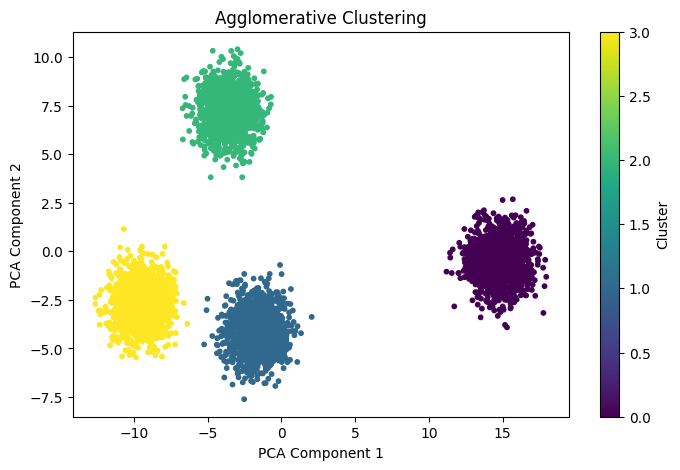

In [16]:
plt.figure(figsize=(8, 5))
plt.scatter(data_new[:, 0], data_new[:, 1], c=pred_labels, s=10)
plt.title("Agglomerative Clustering")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()

In [17]:
sil_score = silhouette_score(data_new, pred_labels)
db_score = davies_bouldin_score(data_new, pred_labels)
ari_score = adjusted_rand_score(pred_labels, pred_labels)
nmi_score = normalized_mutual_info_score(pred_labels, pred_labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Score:", db_score)
print("Adjusted Rand Index:", ari_score)
print("Normalized Mutual Information:", nmi_score)

Silhouette Score: 0.8221010252068515
Davies-Bouldin Score: 0.2500417953232068
Adjusted Rand Index: 1.0
Normalized Mutual Information: 1.0


## Silhouette Score and Davies Bouldin Score Plots

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, adjusted_rand_score, normalized_mutual_info_score
from sklearn.decomposition import PCA

# PCA
pca = PCA(n_components= 2)
data_new = pca.fit_transform(data)


# Calculate Silhoutte Score & DB Score on differente num of cluster
cluster_range = range(2, 11)
sil_scores = []
db_scores = []
for n_cluster in cluster_range:
    agg_clustering = AgglomerativeClustering(n_clusters = n_cluster)
    cluster_label = agg_clustering.fit_predict(data_new)
    # Silhoutte Score
    sil_scores.append(silhouette_score(data_new, cluster_label))
    # DB Score
    db_scores.append(davies_bouldin_score(data_new, cluster_label))

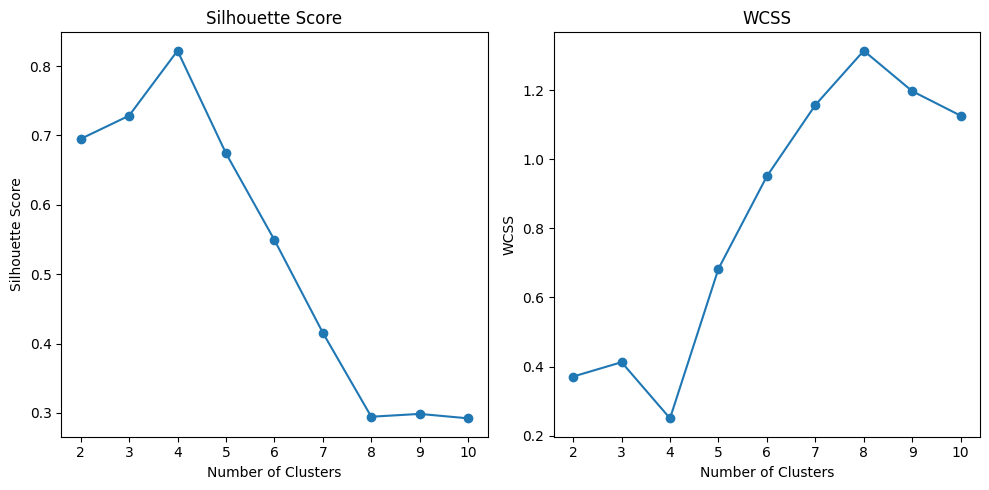

In [19]:
plt.figure(figsize = (10, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, sil_scores, marker = 'o')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

plt.subplot(1, 2, 2)
plt.plot(cluster_range, db_scores, marker = 'o')
plt.title('WCSS')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.tight_layout()
plt.show()